Write a *Matlab* script to generate a data set with $200$ samples and sample sizes $N\in\{10,20,100\}$ using any old distribution.
Compare the distribution of the means for the different $N$.
Use the sample distributions and a t-table to compute $99\%$ confidence intervals.

In [9]:
clear; close all;
save_figures = true; % save flag

Generate the data set.

In [10]:
M = 200; % # of samples
N_a = [10,20,100]; % sample sizes

mu = 27; % population mean
sigma = 9; % population std

rng(1) % seed random number generator
data_a = mu + sigma*randn(N_a(end),M); % normally distributed
size(data_a) % check size
data_a(1:10,1:5) % check first 10 rows and first five columns


ans =

   100   200


ans =

   21.1589   30.2894   27.8705   30.7835   28.3662
   37.6305   17.1264   28.2973   24.0811   34.3486
   20.1739   44.3719   43.7059   39.0699   32.2002
   17.0135   32.6064   36.9030   37.9230   36.5747
   19.3900   32.9156   23.7230   22.4749   19.7709
   21.8460   13.8295   31.2479   16.9527   34.1876
   21.9719   34.6854   19.4480   18.7014   24.1642
   28.6054   32.2244   22.2873   26.9906   37.6746
   25.2282   18.7326   14.5011   28.3814   27.7645
   32.2780   34.1538   27.0382   18.8643   14.1752



Compute the means for different sample sizes.

In [11]:
mu_a = NaN*ones(length(N_a),M);
for i = 1:length(N_a)
    mu_a(i,:) = mean(data_a(1:N_a(i),1:M),1);
end

Plotting the distribution of the means yields \autoref{fig:student_confidence_hist}.

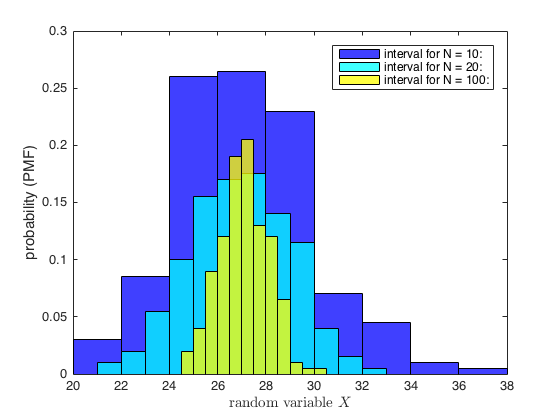

In [34]:
h = figure;
c = jet(3);
for i = 1:length(N_a)
    p = histogram(mu_a(i,:));
    hold on;
    p.Normalization = 'probability';
    p.FaceColor = c(i,:);
    p.FaceAlpha = .75;
    p.DisplayName = sprintf(...
        'interval for N = %i: ',...
        N_a(i)...
    );
end
xlabel('random variable $X$','interpreter','latex');
ylabel('probability (PMF)')
legend('show')
hgsave(h,'figures/temp');

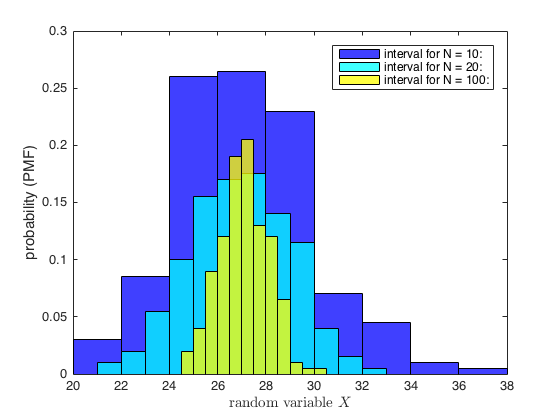

In [35]:
if save_figures
    fn = 'student_confidence_hist.tex';
    h = hgload('figures/temp');
    cleanfigure;
    matlab2tikz(['figures/',fn],...
        'figurehandle',h,...
        'width','.9\linewidth',...
        'height','.33\linewidth',...
        'extraAxisOptions',...
        [...
            'scaled ticks=false,',... 
            'tick label style={/pgf/number format/fixed}'...
        ],...
        'showInfo', false...
    );
end

It makes sense that the larger the sample size, the smaller the spread.
A quantitative metric for the spread is, of course, the standard deviation of the means for each sample size.

In [28]:
S_mu = std(mu_a,0,2)


S_mu =

    2.8365
    2.0918
    1.0097



Look up t-table values for different sample sizes and 99% confidence.
Use these, the mean of means, and the standard deviation of means to compute the 99% confidence interval for each $N$.

In [37]:
t_a = [3.25,2.861,2.626];
for i = 1:length(N_a)
    interval = mean(mu_a(i,:)) + [-1,1]*t_a(i)*S_mu(i);
    disp(sprintf('interval for N = %i: ',N_a(i)))
    disp(interval)
end

interval for N = 10: 
   17.8786   36.3156

interval for N = 20: 
   20.9567   32.9261

interval for N = 100: 
   24.4397   29.7426



As expected, the larger the sample size, the smaller the interval over which we have 99% confidence in the estimate.